In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [69]:
# Load data for vehicle flows
veh_num_array = list(range(1, 29, 1))
veh_data = {veh_num: np.load(f"../pareto/test_av_0_ring_C_200/different_veh/veh_{veh_num}/flow_eps.npy") for veh_num in veh_num_array}
mean_speed_data = {veh_num: np.load(f"../pareto/test_av_0_ring_C_200/different_veh/veh_{veh_num}/mean_speed_eps.npy") for veh_num in veh_num_array}

veh_data[veh_num_array[0]].shape

(50, 1001)

In [70]:
# Define color fading function
def colorFader(c1, c2, mix=0):
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2)

def generate_vehicle_color_pairs(num_range):
    # Predefined color pairs (light to dark shades)
    # Provided color pairs
    color_pairs = [
        ('#FFEBEE', '#B71C1C'),   # very light red to darker red
        ('#FFF9C4', '#A18800'),   # very light yellow to darker yellow
        ('#F48FB1', '#880E4F'),   # very light magenta to darker magenta
        ('#C8E6C9', '#0A3D00'),   # very light green to darker green
        ('#FFE0B2', '#E65100'),   # very light peach to darker orange
        ('#E3F2FD', '#002171'),   # very light blue to darker blue
        ('#B2DFDB', '#004D40'),   # very light teal to darker teal
        ('#FFCCBC', '#8E0000'),   # very light orange to darker orange
        ('#D1C4E9', '#311B92'),   # very light lavender to darker indigo
        ('#F8BBD0', '#560027'),   # very light pink to darker pink
        ('#FFF3E0', '#E65100'),   # very light mango to darker mango
        ('#E1BEE7', '#2C003E'),   # very light purple to darker purple
        ('#DCEDC8', '#33691E'),   # very light mint to darker green
        ('#FFECB3', '#C56000'),   # very light amber to darker amber
        ('#CFD8DC', '#263238'),   # very light slate to darker slate
        ('#EFEBE9', '#1B0000'),   # very light brown to darker brown
        ('#F8BBD0', '#880E4F'),   # very light rose to darker rose
        ('#E0F7FA', '#00363A'),   # very light cyan to darker cyan
        ('#B3E5FC', '#01579B'),   # very light sky blue to darker sky blue
        ('#ECEFF1', '#000A12'),   # very light blue-grey to darker blue-grey
        ('#F4FF81', '#827717'),   # very light chartreuse to darker greenish yellow
        ('#F1F8E9', '#1B5E20'),   # very light green to darker green
        ('#B2EBF2', '#006064'),   # very light turquoise to darker turquoise
        ('#FFEBEE', '#B71C1C'),   # very light red to darker red (repeated)
        ('#FFF9C4', '#A18800'),   # very light yellow to darker yellow (repeated)
        ('#F48FB1', '#880E4F'),   # very light magenta to darker magenta (repeated)
        ('#C8E6C9', '#0A3D00'),   # very light green to darker green (repeated)
        ('#FFE0B2', '#E65100'),   # very light peach to darker orange (repeated)
        ('#E3F2FD', '#002171'),   # very light blue to darker blue (repeated)
    ]

    # Ensure the number range is within the color palette size
    max_colors = len(color_pairs)
    if len(num_range) > max_colors:
        raise ValueError(f"Range too large. Max supported range size is {max_colors}.")

    # Create the vehicle color dictionary
    vehicle_colors = {}
    for i, num in enumerate(num_range):
        vehicle_colors[num] = color_pairs[i]
    
    return vehicle_colors




In [71]:
# Function to plot vehicle data
def plot_vehicle_data(veh_num_array, veh_data, veh_colors):
    fig, ax = plt.subplots(figsize=(8, 6))
    for veh_num in veh_num_array:
        data = veh_data[veh_num]
        n = data.shape[0]  # number of evaluation times
        x = range(data.shape[1])
        c1, c2 = veh_colors[veh_num]
        # Plotting each episode for the current vehicle number
        for i in range(n):
            plt.plot(x, data[i, :], color=colorFader(c1, c2, i / n))
        plt.plot(x, data[-1, :], label=f"veh num: {veh_num}")

    plt.ylabel("Flow", fontsize=10)
    plt.xlabel("Step number", fontsize=10)
    plt.title("The darker color represents later episodes, the lighter color represents earlier episodes")
    plt.legend()
    plt.show()



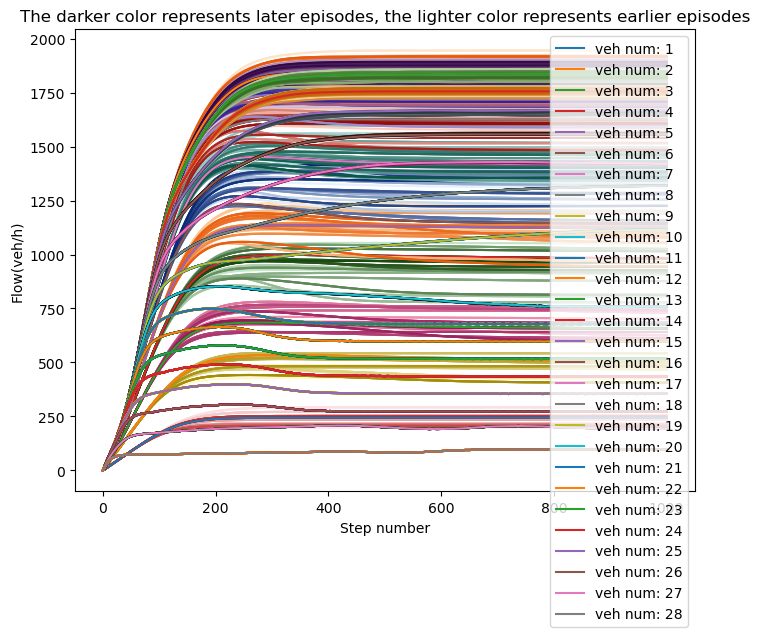

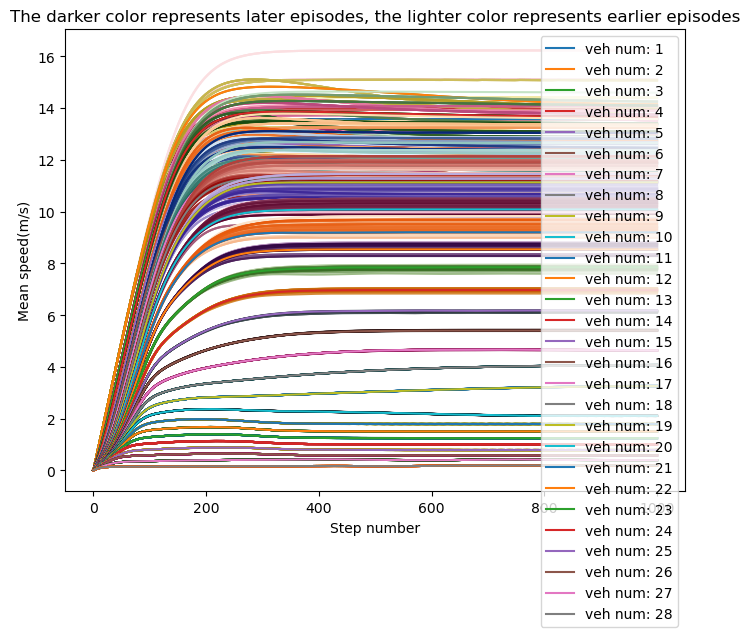

In [72]:

# Function to plot vehicle data
def plot_vehicle_data(veh_num_array, veh_data, veh_colors, label):
    fig, ax = plt.subplots(figsize=(8, 6))
    for veh_num in veh_num_array:
        data = veh_data[veh_num]
        n = data.shape[0]  # number of evaluation times
        x = range(data.shape[1])
        c1, c2 = veh_colors[veh_num]
        # Plotting each episode for the current vehicle number
        for i in range(n):
            plt.plot(x, data[i, :], color=colorFader(c1, c2, i / n))
        plt.plot(x, data[-1, :], label=f"veh num: {veh_num}")

    plt.ylabel(label, fontsize=10)
    plt.xlabel("Step number", fontsize=10)
    plt.title("The darker color represents later episodes, the lighter color represents earlier episodes")
    plt.legend()
    plt.show()
    
veh_colors = generate_vehicle_color_pairs(veh_num_array)

# Call the function to plot data
plot_vehicle_data(veh_num_array, veh_data, veh_colors, "Flow(veh/h)")
plot_vehicle_data(veh_num_array, mean_speed_data, veh_colors, label="Mean speed(m/s)")



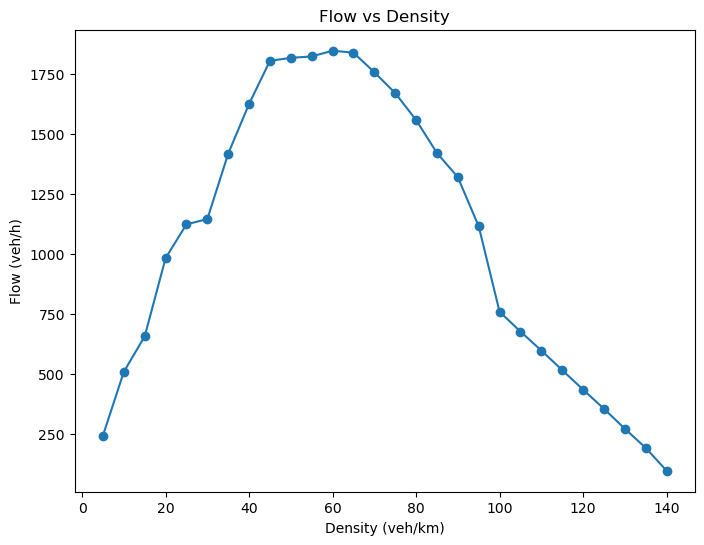

In [73]:
# Plotting Flow vs Density
fig, ax = plt.subplots(figsize=(8, 6))
density = np.array(veh_num_array) / (200 * 1e-3)
flow = np.array([veh_data[veh_num][-1, -1] for veh_num in veh_num_array])

plt.plot(density, flow, marker='o', label="Flow vs Density")
plt.ylabel("Flow (veh/h)", fontsize=10)
plt.xlabel("Density (veh/km)", fontsize=10)
plt.title("Flow vs Density")
# plt.legend(loc="upper right")
plt.show()
